# The (vector) optimal filter of Wiener
Again, joint work with Charlie Peskin (NYU).
$\newcommand{\mf}{\mathfrak} \newcommand{\E}{\mathrm{e}} \newcommand{\I}{\mathrm{i}} \newcommand{\mf}{\mathfrak}$ 

In [35]:
using ApproxFunRational, AbstractIterativeSolvers, Plots

\begin{align*}
u(\omega)  - \begin{pmatrix} \frac{2 \lambda s_0^2}{\lambda^2 + \omega^2} + p_{\mf n \mf n} + p_{\mf m \mf m} - 1 & \frac{2 \lambda s_0^2}{\lambda^2 + \omega^2} \E^{-\I \Delta_{\mf s} \omega} + p_{\mf n \mf n} \E^{- \I \Delta_{\mf n} \omega} \\
\frac{2 \lambda s_0^2}{\lambda^2 + \omega^2} \E^{\I \Delta_{\mf s} \omega} + p_{\mf n \mf n} \E^{ \I \Delta_{\mf n} \omega} &  \frac{2 \lambda s_0^2}{\lambda^2 + \omega^2} + p_{\mf n \mf n} + p_{\mf m \mf m} - 1
\end{pmatrix} \mathcal C^- u(\omega) = \begin{pmatrix} \frac{2 \lambda s_0^2}{\lambda^2 + \omega^2}\E^{ - \I (d - d_{\mf s,1}) \omega} \\ \frac{2 \lambda s_0^2}{\lambda^2 + \omega^2}\E^{ - \I (d - d_{\mf s,2}) \omega} \end{pmatrix}
\end{align*}

In [36]:
tol = 1.e-4
Ds1 = 0.5
Ds2 = 1.
Δs = Ds2-Ds1
Dn1 = 1.
Dn2 = 0.5
Δn = Dn2 - Dn1
rn = 1.
s0n = 1/sqrt(2.)
λ = 1.
s0s = 1/sqrt(2.)
pnn = 1
pmm = .2
L = 1.
D = 1.;

In [37]:
fPss = z -> 2*λ*s0s^2.0/(λ^2+z.^2)
#fPss = z -> .1*exp(-z^2/2)
fPnn = z -> pnn
fPmm = z -> pmm
Pss = Fun(zai(fPss),OscLaurent(0.0,L))
One = pad(Fun(1.,OscLaurent(0.0,L)),3)
Pnn = pnn*One
Pmm = pmm*One;

Set up coefficient matrix and right-hand side.

In [38]:
H = zeros(Fun,2,2)
a = Pss + Pnn + Pmm - One
b = Pss*Fun(1.,OscLaurent(-Δs,L)) + Pnn*Fun(1.,OscLaurent(-Δn,L))
bt = Pss*Fun(1.,OscLaurent(Δs,L)) + Pnn*Fun(1.,OscLaurent(Δn,L))
H[1,1] = a
H[2,2] = a
H[1,2] = b
H[2,1] = bt
G = map(SumFun,H)
b1 = Pss*Fun(1.,OscLaurent(- D + Ds1,L))
b2 = Pss*Fun(1.,OscLaurent(- D + Ds2,L))
h = map(SumFun,[b1,b2]);

In [39]:
𝓒⁻ = Cauchy(-1); 𝓕 = FourierTransform(-1.0)
simp(f) = combine!(chop!(f,tol));

In [40]:
𝓢 = x -> simp(x - G*(𝓒⁻*x))
out = GMRES(𝓢,h,⋅,tol,30, x -> x);
û = +([out[2][i]*out[1][i] for i=1:length(out[2])]...);

iteration = 2, residual = 0.3964208010701239
iteration = 3, residual = 0.26541953242158517
iteration = 4, residual = 0.17443933348785734
iteration = 5, residual = 0.1334839103261978
iteration = 6, residual = 0.07628617876956464
iteration = 7, residual = 0.030822126632885673
iteration = 8, residual = 0.023847067340100805
iteration = 9, residual = 0.01575923522842553
iteration = 10, residual = 0.007142655847603047
iteration = 11, residual = 0.0046229780487346
iteration = 12, residual = 0.003140050189728975
iteration = 13, residual = 0.0023655031968497662
iteration = 14, residual = 0.001077341964348756
iteration = 15, residual = 0.0005520636137960079
iteration = 16, residual = 0.00044963837948131885
iteration = 17, residual = 0.00021941560504774814
iteration = 18, residual = 9.733154917318849e-5


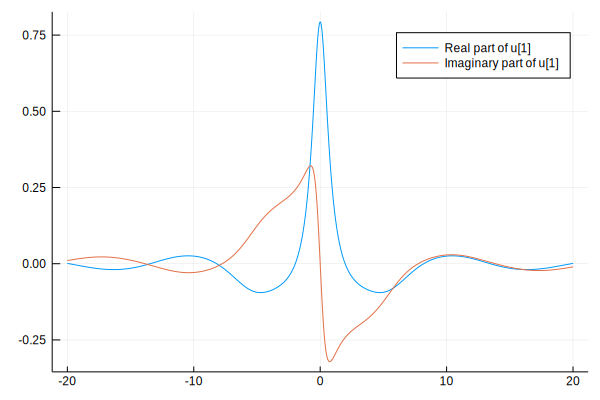

In [41]:
ω = -20:.01:20
y1 = map(û[1],ω)
plot(ω,real(y1), label = "Real part of u[1]")
plot!(ω,imag(y1), label = "Imaginary part of u[1]")

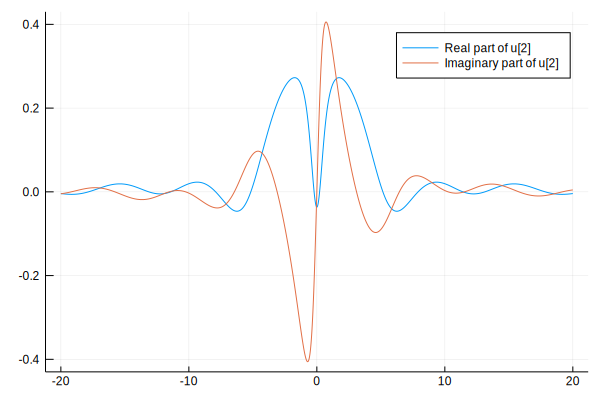

In [42]:
ω = -20:.01:20
y1 = map(û[2],ω)
plot(ω,real(y1), label = "Real part of u[2]")
plot!(ω,imag(y1), label = "Imaginary part of u[2]")

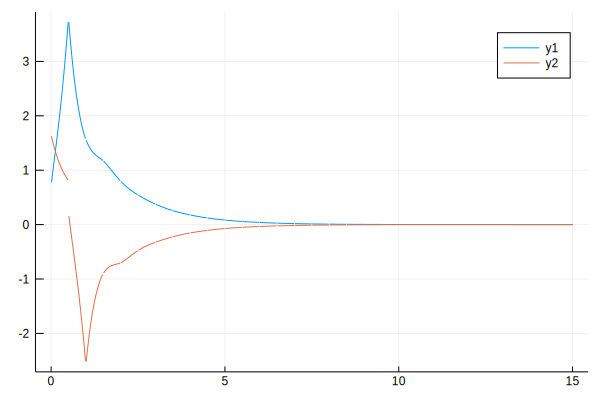

In [43]:
u = 𝓕*û
ω = 0:.01:15
y1 = map(u[1],ω)
y2 = map(u[2],ω)
plot(ω,real(y1))
plot!(ω,real(y2))